## CreditCard Fraud

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, accuracy_score,f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.impute import KNNImputer


from sklearn.decomposition import PCA



## **Making important functions**<br>
- 1-Function for Data Collection
- 2-Getting major details of data
- 3-Investigating Target Coulmn
- 4-Investigating Categorical Columns
- 5-Label Encoding and One hot encoding
- 6-Handling Class imbalance
- 7-Function for data Cleaning
- 8-EDA
- 9-Transformation
- 10-Feature Selection
- 11- Dimensionality Reduction
- 12- Storing results in a dataframe.
- 13- ML Algorithm

### **1- Function for Data Collection:**
Thisfunction will collect the data by giving the location of dataset using following format.<br>
Loc= r'G:\USB data\IBA\IBA PhD\Course Work\Machine Learnin1\WIDS_Datathon_2024#1\New Folder\training.csv'


In [2]:
import chardet
import pandas as pd

def import_dataset(Loc):
    # Read the raw data to detect encoding
    rawdata = open(Loc, 'rb').read()
    result = chardet.detect(rawdata)
    
    # Read the CSV file using the detected encoding
    data = pd.read_csv(Loc, encoding=result['encoding'])
    
    return data




### **2- Getting Major details of data**

In [3]:
def description_dataset(df):

    desc = pd.DataFrame(index = list(df))
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    desc['min'] = df.min()
    desc['max'] = df.max()
    return desc



### **3- Investigating Target column:**

In [4]:
# This function will print counts of each label with label values and you can use it to see the class balance. df=df['target']
def inv_target(df):
    unique_value_counts = df.value_counts().to_dict()
    print(unique_value_counts)
    return

### **4- Investigating Categorical columns:**

In [5]:
def inv_cat(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in df.select_dtypes(include=['object']).columns:
    # Print column name
        print(f"Column: {column}")
    
    # Unique values and their counts
        unique_values = df[column].value_counts()
        print("Unique values and their counts:")
        print(unique_values)
    
    # Number of null values
        null_values_count = df[column].isnull().sum()
        print(f"Number of null values: {null_values_count}")
    
    print("\n")
    return()




### **5- Label Encoding and One hot encoding:**

In [6]:
def one_hot_encode(df, columns):
   
    # Generate one-hot encoding
    one_hot_df = pd.get_dummies(df, columns=columns, drop_first=True)
    
    # Delete original columns
    for col in columns:
        del one_hot_df[col]
    
    return one_hot_df

def encode_numerical_features(df):
    encoded_df = df.copy()
    label_encoders = {}  # Dictionary to store label encoders for each categorical feature

    categorical_features = df.select_dtypes(include='object').columns  # Extract column names

    for feature in categorical_features:
        if not pd.api.types.is_numeric_dtype(df[feature]):
            # Perform label encoding for categorical variables
            label_encoder = LabelEncoder()
            encoded_df[feature] = label_encoder.fit_transform(encoded_df[feature])

            # Store variable name along with category labels
            label_encoders[feature] = {category: label for label, category in enumerate(label_encoder.classes_)}

    # Print the label encoders
    for feature, encoding_mapping in label_encoders.items():
        print(f"Encoding mapping for {feature}:")
        for category, label in encoding_mapping.items():
            print(f"  {category} -> {label}")

    return encoded_df


### **6- Handling Class Imbalance:**

In [7]:
def apply_smote(df, target_column_name):
    # Separate features and target variable
    X = df.drop(columns=[target_column_name])
    y = df[target_column_name]
    
    # Instantiate SMOTE object
    smote = SMOTE(random_state=42)
    
    # Fit and transform the data
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Create a new DataFrame with resampled data
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column_name])], axis=1)
    
    return df_resampled



def apply_adasyn(df, target_column_name):
    # Separate features and target variable
    X = df.drop(columns=[target_column_name])
    y = df[target_column_name]
    
    # Instantiate ADASYN object
    adasyn = ADASYN(random_state=42)
    
    # Fit and transform the data
    X_resampled, y_resampled = adasyn.fit_resample(X, y)
    
    # Create a new DataFrame with resampled data
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column_name])], axis=1)
    
    return df_resampled


# Assuming X and y are your features and target variable, respectively
def apply_undersampling(X,y):
    # Initialize RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=42)

    # Perform under-sampling
    X, y = undersampler.fit_resample(X, y)

    return X,y




In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model

#Applying GAN at whole_data

# Split the dataset into features (X) and labels (y)
X = fraud.drop(columns=['Class'])
y = fraud['Class']

# Separate majority and minority classes
majority_class = X[y == 0]
minority_class = X[y == 1]

# Define the dimensionality of the latent space for the GAN
latent_dim = 100

# Define the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, input_dim=latent_dim, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X.shape[1], activation='tanh')
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(512, input_shape=(X.shape[1],), activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the discriminator model
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combine generator and discriminator into a GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Build and compile the GAN
generator = build_generator(latent_dim)
gan = build_gan(generator, discriminator)

# Compile the generator model
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GAN
epochs = 100
batch_size = 64
for epoch in range(epochs):
    # Generate random noise
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    # Generate synthetic samples
    synthetic_samples = generator.predict(noise)
    # Create a batch of real and synthetic samples
    X_combined = np.vstack([majority_class, synthetic_samples])
    y_combined = np.hstack([np.zeros(len(majority_class)), np.ones(len(synthetic_samples))])
    # Train the discriminator
    discriminator.trainable = True
    discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)
    # Train the generator (via the GAN model)
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    y_gan = np.zeros(len(minority_class))
    discriminator.trainable = False
    gan_loss = gan.train_on_batch(noise, y_gan)

# Generate synthetic samples using the trained generator
num_samples_to_generate = len(majority_class) - len(minority_class)
noise = np.random.normal(0, 1, size=(num_samples_to_generate, latent_dim))
generated_data = generator.predict(noise)

# Combine generated data with original minority class to balance the dataset
X_balanced = np.vstack([majority_class, generated_data])
y_balanced = np.hstack([np.zeros(len(majority_class)), np.ones(len(generated_data))])

# Optionally shuffle the balanced dataset
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df['Class'] = y_balanced
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

# Now you can use 'balanced_df' as your balanced dataset for further analysis or modeling


8870/8870 [==============================] - 19s 2ms/step


In [ ]:
import numpy as np     #For train data
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model



# Split the dataset into features (X) and labels (y)
X = fraud.drop(columns=['Class'])
y = fraud['Class']

X_train, X1_test, y_train, y1_test = train_test_split(X,y,test_size=0.3, random_state=42)

fraud_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
X = fraud_train.drop(columns=['Class'])
y = fraud_train['Class']

# Separate majority and minority classes
majority_class = X[y == 0]
minority_class = X[y == 1]

# Define the dimensionality of the latent space for the GAN
latent_dim = 100

# Define the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, input_dim=latent_dim, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X.shape[1], activation='tanh')
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(512, input_shape=(X.shape[1],), activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the discriminator model
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combine generator and discriminator into a GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Build and compile the GAN
generator = build_generator(latent_dim)
gan = build_gan(generator, discriminator)

# Compile the generator model
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GAN
epochs = 100
batch_size = 64
for epoch in range(epochs):
    # Generate random noise
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    # Generate synthetic samples
    synthetic_samples = generator.predict(noise)
    # Create a batch of real and synthetic samples
    X_combined = np.vstack([majority_class, synthetic_samples])
    y_combined = np.hstack([np.zeros(len(majority_class)), np.ones(len(synthetic_samples))])
    # Train the discriminator
    discriminator.trainable = True
    discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)
    # Train the generator (via the GAN model)
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    y_gan = np.zeros(len(minority_class))
    discriminator.trainable = False
    gan_loss = gan.train_on_batch(noise, y_gan)

# Generate synthetic samples using the trained generator
num_samples_to_generate = len(majority_class) - len(minority_class)
noise = np.random.normal(0, 1, size=(num_samples_to_generate, latent_dim))
generated_data = generator.predict(noise)

# Combine generated data with original minority class to balance the dataset
X_balanced = np.vstack([majority_class, generated_data])
y_balanced = np.hstack([np.zeros(len(majority_class)), np.ones(len(generated_data))])

# Optionally shuffle the balanced dataset
balanced_df_train = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df_train['Class'] = y_balanced
balanced_df_train = balanced_df_train.sample(frac=1).reset_index(drop=True)

# Now you can use 'balanced_df' as your balanced dataset for further analysis or modeling


6208/6208 [==============================] - 13s 2ms/step


### **7- Function for Data Cleaning:**

This function will deal with null values and duplicates by using different strategy, use apprpriate function for your pipeline.

In [9]:

def list_columns_with_missing_values(df):
    result=df.isnull().sum(0)
    return result



def drop_null(df): #This function will clean the dataset by dropping null values.
    df.dropna(inplace=True)
    return(df)

def fill_null_mean(df):
    
    df_float = df.select_dtypes(include='float64').columns.tolist()
    # Make a copy of float columns
    X = df[df_float].copy()
    
    # Calculate means of each column
    means = X.mean()
    
    # Fill missing values with mean values
    X.fillna(value=means, inplace=True)
    
    # Assign the filled float columns back to the original DataFrame
    df[df_float] = X
    
    return df
Mean_Fill=FunctionTransformer(fill_null_mean)

# Usage:
# df = fill_null_mean(df)


def fill_null_median(df): #This function will clean the dataset by dropping null values.
    median=df.median()
    df.fillna(value=median, inplace=True)  # Fill missing values with mean values
    return(df)


def fill_null_knn(df):

    columns_with_missing_values = df.columns[df.isnull().any()].tolist()
    # extract the data from the selected columns
    X = df[columns_with_missing_values].values
    
    # create a KNN imputer object with k
    imputer = KNNImputer(n_neighbors=2)

    # impute the missing values using KNN imputation
    X_imputed = imputer.fit_transform(X)

    # replace the original columns with the imputed columns
    df[columns_with_missing_values] = X_imputed

    return(df)

def fill_null_knn(df):
# Assuming df is your dataframe
    imputer = KNNImputer()
    imputed_data = imputer.fit_transform(df)
    
    # Replace original dataframe with imputed data
    df = pd.DataFrame(imputed_data, columns=df.columns)
    return df
# Use below function after converting categorical variable to dummy variable.

def filter_fill_replace(df, threshold, fill_technique='mean'):
    # Step 1: Filter DataFrame based on number of missing values
    columns_with_missing_values = df.columns[df.isnull().any()]
    filtered_df = df[columns_with_missing_values[df[columns_with_missing_values].isnull().sum() > threshold]]
    
    # Step 2: Fill missing values using specified technique
    for column in filtered_df.columns:
        
        if fill_technique == 'mean':
            fill_value = filtered_df[column].mean()
        elif fill_technique == 'median':
            fill_value = filtered_df[column].median()
        elif fill_technique == 'mode':
            fill_value = filtered_df[column].mode().iloc[0]  # Use mode for categorical data
        elif fill_technique == 'knn':
            filled_df = fill_null_knn(filtered_df)
            df[filtered_df.columns] = filled_df
            return df
        else:
            raise ValueError("Invalid fill technique. Supported techniques: 'mean', 'median', 'mode', 'knn'")
        
        filtered_df[column].fillna(fill_value, inplace=True)
    
    # Step 3: Replace filled columns back into the original DataFrame
    df[filtered_df.columns] = filtered_df
    
    return df

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

def impute_missing_mice(df, max_iter=10, random_state=None):
   
    # Initialize MICE imputer
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)
    
    # Fit and transform the data
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    return imputed_df


def dealing_with_duplicates(df): #This function will clean the dataset.
    print("Number of duplicate rows in your data set:",df.duplicated().sum())
    print("All the duplicate rows have been deleted from data set")

    df.drop_duplicates(inplace=True)
    return(df)




### **8-Exploratory Data Analysis:**
This function will show the five numer summary of numeric features.<br>
It displays histogram of each numerical variable.<br>
It displays box plot for each numerical feature.<br>
It displays correlation matrix between numerical features.<br>


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def eda(df, hist_color='MAROON', boxplot_color='MAROON'):
    # Separating numerical and categorical features
    numeric_features = df.select_dtypes(include=['float64','int64'])
    categorical_features = df.select_dtypes(include=['object', 'int64'])

    # Summary statistics
    summary_stats = numeric_features.describe().style.set_properties(**{'color': 'maroon', 'text-align': 'center', 'font-weight': 'bold'})
    print("\n\033[1m\033[91mSummary Statistics:\033[0m")
    display(summary_stats)


    num_cols = len(numeric_features.columns)
    num_rows = (num_cols - 1) // 3 + 1  # Calculate number of rows needed

    # Histograms and Box plots
    fig, axes = plt.subplots(nrows=num_rows*2, ncols=3, figsize=(16, 5*num_rows))

    for i, column in enumerate(numeric_features.columns):
        row = i // 3
        col = i % 3

        sns.histplot(df[column], bins=20, kde=True, color=hist_color, ax=axes[row*2, col])
        axes[row*2, col].set_title(f'Histogram of {column}')
        axes[row*2, col].set_xlabel(column)
        axes[row*2, col].set_ylabel('Frequency')

        sns.boxplot(data=df, y=column, color=boxplot_color, ax=axes[row*2+1, col])
        axes[row*2+1, col].set_title(f'Boxplot of {column}')
        axes[row*2+1, col].set_ylabel(column)

    plt.tight_layout()
    plt.show()

    # Correlation matrix
    # Calculate correlation matrix
    correlation_matrix = numeric_features.corr()

    # Correlation matrix
    plt.figure(figsize=(30, 30))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1)
    plt.title('Correlation Heatmap of 30 Variables')
    plt.xlabel('Variables')
    plt.ylabel('Variables')
    plt.show()




### **9-Tranformations:**
This function will perform the normalization on data.

In [11]:
def z_score_normalize_n(df):# Apply z-score normalization to specified numerical features but use with precaution if required
    Numeric_features=df.select_dtypes(include='float64').columns
    for feature in Numeric_features:
        df[feature] = zscore(df[feature])
    return df
def z_score_normalize_i(df):# Apply z-score normalization to specified numerical features but use with precaution if required
    Numeric_features=df.select_dtypes(include='int64').columns
    for feature in Numeric_features:
        df[feature] = zscore(df[feature])
    return df


### **10-Feature Selection:**
Here we are using ChiSquare and Fstatistics test to select features manually, we will also drop features with high multi collinearity.

In [12]:
def chisquare1(X_train,y_train):
    X_train_cat = X_train.select_dtypes(include = 'object').copy()
    # define an empty dictionary to store chi-squared test results
    chi2_check = {}

    # loop over each column in the training set to calculate chi-statistic with the target variable
    for column in X_train_cat:
         chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
         chi2_check.setdefault('Feature',[]).append(column)
         chi2_check.setdefault('p-value',[]).append(round(p, 10))

    # convert the dictionary to a DF
    chi2_result = pd.DataFrame(data = chi2_check)
    chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
    return chi2_result


In [13]:
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency

def chisquare(df):
    # Filter categorical columns
    categorical_columns = df.select_dtypes(include='object').columns
    
    # Define an empty dictionary to store chi-squared test results
    chi2_results = {}

    # Loop over all combinations of categorical columns (pairwise)
    for combination in combinations(categorical_columns, 2):
        # Calculate chi-square statistic for the combination
        chi, p, _, _ = chi2_contingency(pd.crosstab(df[combination[0]], df[combination[1]]))
        chi2_results[combination] = round(p, 10)

    # Convert the dictionary to a DataFrame
    chi2_result = pd.DataFrame(chi2_results.items(), columns=['Features', 'p-value'])
    chi2_result.sort_values(by='p-value', ascending=True, ignore_index=True, inplace=True)
    return chi2_result

# Example usage:
# chisquare(df)

# Example usage:
# chisquare(df, 'target_column_name')


In [14]:
def FStatistics(X_train, y_train):
    # Filter numerical columns
    X_train_num = X_train.select_dtypes(include=['float64', 'int64']).copy()
    # Calculate F Statistic and corresponding p values
    F_statistic, p_values = f_classif(X_train_num, y_train)
    # Convert to a DataFrame
    ANOVA_F_table = pd.DataFrame(data={'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
    ANOVA_F_table.sort_values(by=['F-Score'], ascending=False, ignore_index=True, inplace=True)
    return ANOVA_F_table


In [15]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np     
# for feature names give X.columns

def mutual_information_regression(X, y, feature_names):

    # Calculate mutual information
    mutual_info = mutual_info_regression(X, y)

    # Create list of tuples containing feature names and mutual information values
    mi_values = [(feature_names[i], mutual_info[i]) for i in range(len(feature_names))]

    # Sort the list in descending order of mutual information values
    sorted_mi_values = sorted(mi_values, key=lambda x: x[1], reverse=True)

    return sorted_mi_values



In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Import other algorithms as needed
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
import numpy as np

def feature_importance_scores(X,y, algorithm):
    
    
    # Initialize the classifier based on the specified algorithm
    if algorithm == 'random_forest':
        clf = RandomForestClassifier()
    elif algorithm == 'decision_tree':
        clf = DecisionTreeClassifier()
    elif algorithm == 'logistic_regression':
        clf = LogisticRegression()
    elif algorithm == 'svm':
        clf = SVC(kernel='linear')  # Use linear kernel for SVM
    else:
        raise ValueError("Invalid algorithm name. Supported algorithms: 'random_forest', 'decision_tree', 'logistic_regression', 'svm'")
    
    # Fit the classifier to the data
    clf.fit(X, y)
    
    # Get feature importances or coefficients
    if algorithm in ['random_forest', 'decision_tree']:
        importances = clf.feature_importances_
    elif algorithm == 'logistic_regression':
        importances = np.abs(clf.coef_[0])
    elif algorithm == 'svm':
        importances = np.abs(clf.coef_.toarray()[0])
    
    # Create a dictionary of feature names and their importance scores
    feature_scores = dict(zip(X.columns, importances))
    
    return feature_scores


### **11-Dimensionality Reduction:**

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
# Function for observation of magnitude of eigen values.
def finding_eigenvalues(X):
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    eigenvalues = pca.explained_variance_
    print("Eigenvalues:", eigenvalues)

    return()


In [18]:
from sklearn.decomposition import PCA
import pandas as pd

def apply_pca(df, n_components):
    
    # Initialize PCA with the specified number of components
    pca = PCA(n_components=n_components)
    
    # Fit PCA to the data and transform the data
    X_pca = pca.fit_transform(df)
    
    # Create a DataFrame for the transformed data
    columns = [f'PC{i}' for i in range(1, n_components + 1)]
    df_pca = pd.DataFrame(data=X_pca, columns=columns)
    
    return df_pca


### **12- Storing Results**

In [19]:

# Start with an empty DataFrame
results_df = pd.DataFrame(columns=['Balancing Technique', 'Model Name', 'Accuracy', 'Precision', 'Recall', 'AUC_ROCcurve'])

# Define a function to add rows to the DataFrame
def add_result(balancing_technique, model_name, accuracy, precision, recall, AUC_ROCcurve):
    global results_df  # Access the global DataFrame
    results_df = results_df._append({
        'Balancing Technique': balancing_technique,
        'Model Name': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC_ROCcurve': AUC_ROCcurve
    }, ignore_index=True)

### **13-ML Algorithm**

In [20]:
def apply_ML_algov2(X_train, y_train, X_test, y_test, model_name, balancing_technique):
    # Initialize Logistic Regression model
    model = model_name
    
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    AUC_ROCcurve= roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report  = classification_report(y_test, y_pred)

    # Add results to DataFrame
    add_result(balancing_technique, str(model_name), accuracy, precision, recall, AUC_ROCcurve)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % AUC_ROCcurve)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    

In [21]:
def apply_ML_algov3(X_train, y_train, X_test, y_test, model_name, balancing_technique):#For algorithmic NaiveBayes
    # Calculate class weights
    class_counts = y_train.value_counts()
    total_samples = len(y_train)
    class_weights = {class_label: total_samples / count for class_label, count in class_counts.items()}

    # Compute class priors based on class weights
    class_priors = {class_label: count / total_samples for class_label, count in class_counts.items()}
    class_priors = [class_priors[label] for label in sorted(class_priors.keys())]

    # Initialize model with modified class priors
    model = GaussianNB(priors=class_priors)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    AUC_ROCcurve= roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report  = classification_report(y_test, y_pred)

    # Add results to DataFrame
    add_result(balancing_technique, str(model_name), accuracy, precision, recall, AUC_ROCcurve)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % AUC_ROCcurve)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    

In [22]:
def apply_ML_algo_withcv(X,y,model_name):
    # Perform cross-validation
    # Initialize Logistic Regression model
    model = model_name
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # Change cv value as needed

    # Print the cross-validation scores
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())
    

## **MasterFunction**

In [23]:
fraud=import_dataset(r'G:\USB data\IBA\IBA PhD\Course Work\Machine Learnin1\Project\creditcard.csv')


In [24]:
description_dataset(fraud)

,type,count,nunique,%unique,null,%null,min,max
Time,float64,284807,124592,43.746116,0,0.0,0.000000,172792.000000
V1,float64,284807,275663,96.789405,0,0.0,-56.407510,2.454930
V2,float64,284807,275663,96.789405,0,0.0,-72.715728,22.057729
V3,float64,284807,275663,96.789405,0,0.0,-48.325589,9.382558
V4,float64,284807,275663,96.789405,0,0.0,-5.683171,16.875344
V5,float64,284807,275663,96.789405,0,0.0,-113.743307,34.801666
V6,float64,284807,275663,96.789405,0,0.0,-26.160506,73.301626
V7,float64,284807,275663,96.789405,0,0.0,-43.557242,120.589494
V8,float64,284807,275663,96.789405,0,0.0,-73.216718,20.007208
V9,float64,284807,275663,96.789405,0,0.0,-13.434066,15.594995


In [25]:
#eda(fraud)

In [26]:
fraud.drop(columns=['Time'],inplace=True)


In [27]:
fraud=z_score_normalize_n(fraud)
# Apply z-score normalization to specified numerical features but use with precaution if required


In [28]:
fraud.shape

(284807, 30)

## Experiment no 1: Using all features and cv

In [29]:
X = fraud.drop('Class', axis=1)
y = fraud['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5888\1309814307.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = results_df._append({


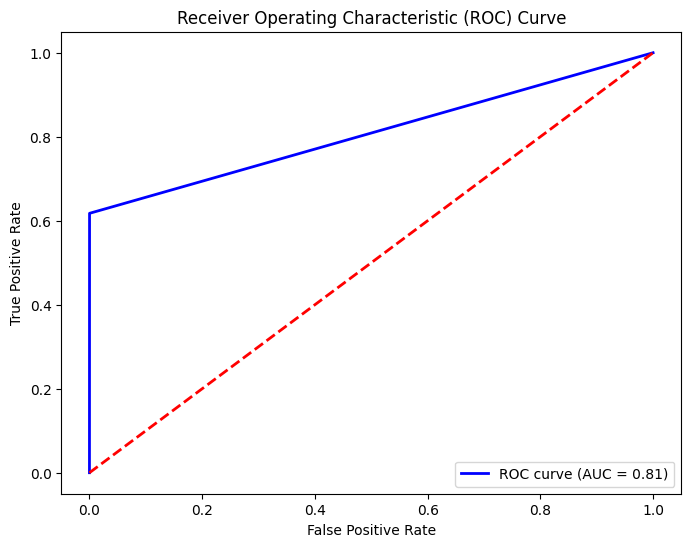

Confusion Matrix:
[[85294    13]
 [   52    84]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.62      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [30]:
apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'None')

In [31]:
from tabulate import tabulate

# Assuming `results_df` is your DataFrame
print(tabulate(results_df, headers='keys', tablefmt='pipe'))

|    | Balancing Technique   | Model Name           |   Accuracy |   Precision |   Recall |   AUC_ROCcurve |
|---:|:----------------------|:---------------------|-----------:|------------:|---------:|---------------:|
|  0 | None                  | LogisticRegression() |   0.999239 |    0.865979 | 0.617647 |       0.808747 |


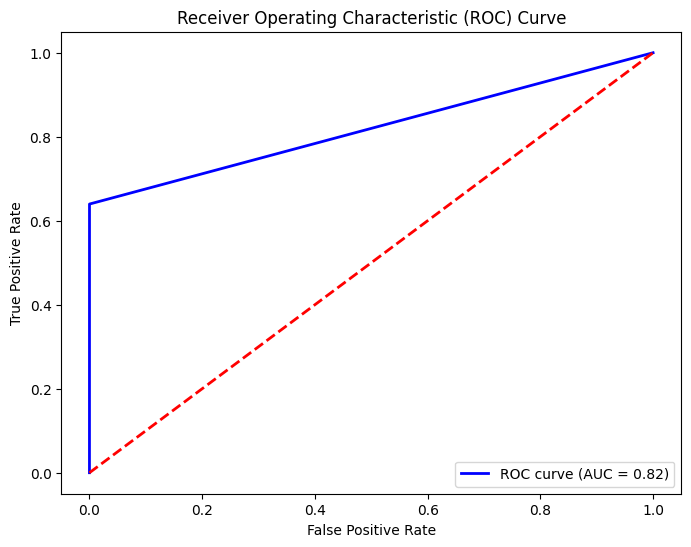

Confusion Matrix:
[[85301     6]
 [   49    87]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.64      0.76       136

    accuracy                           1.00     85443
   macro avg       0.97      0.82      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [33]:
import warnings
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'None')

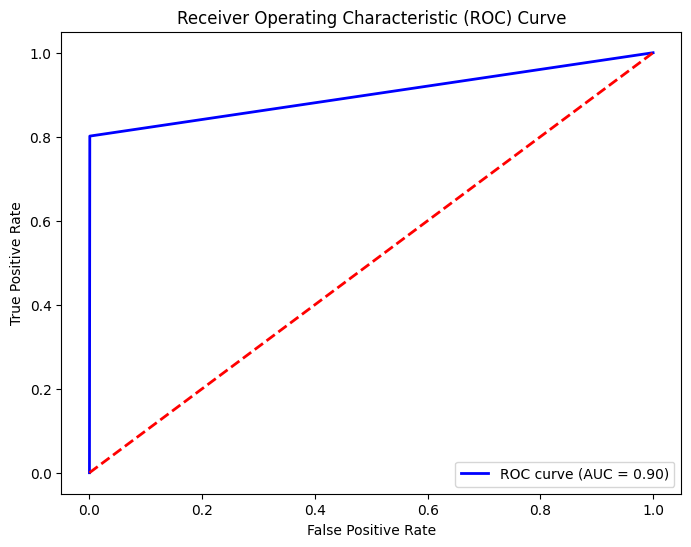

Confusion Matrix:
[[85257    50]
 [   27   109]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.69      0.80      0.74       136

    accuracy                           1.00     85443
   macro avg       0.84      0.90      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [34]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'None')

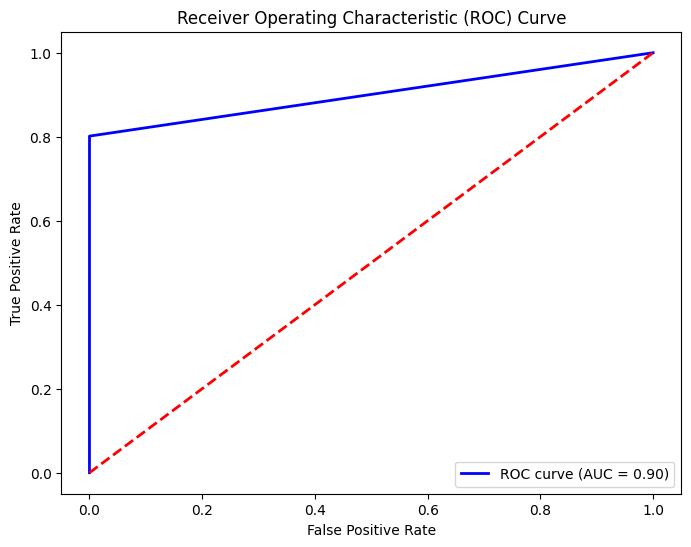

Confusion Matrix:
[[85301     6]
 [   27   109]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [35]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'None')

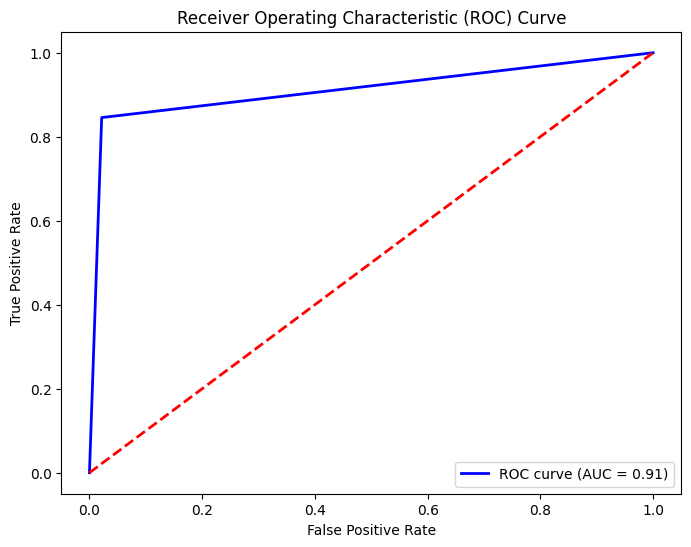

Confusion Matrix:
[[83456  1851]
 [   21   115]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [36]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, GaussianNB(), 'None')

In [37]:
print(tabulate(results_df, headers='keys', tablefmt='pipe'))

|    | Balancing Technique   | Model Name               |   Accuracy |   Precision |   Recall |   AUC_ROCcurve |
|---:|:----------------------|:-------------------------|-----------:|------------:|---------:|---------------:|
|  0 | None                  | LogisticRegression()     |   0.999239 |   0.865979  | 0.617647 |       0.808747 |
|  1 | None                  | SVC()                    |   0.999356 |   0.935484  | 0.639706 |       0.819818 |
|  2 | None                  | DecisionTreeClassifier() |   0.999099 |   0.685535  | 0.801471 |       0.900442 |
|  3 | None                  | RandomForestClassifier() |   0.999614 |   0.947826  | 0.801471 |       0.9007   |
|  4 | None                  | GaussianNB()             |   0.978091 |   0.0584944 | 0.845588 |       0.911945 |


## Experiment no 2:Resampling by SMOTE(train_data).

In [38]:
# Split dataset into train and test
X = fraud.drop('Class', axis=1)
y = fraud['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

fraud_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)


fraud_train=apply_smote(fraud_train, 'Class')
fraud_train.to_csv('fraud_balanced_smote_whole.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file

In [39]:
value_counts = fraud_train['Class'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 199008
Category value 1: Number of occurrences: 199008


In [40]:
fraud_train=dealing_with_duplicates(fraud_train)
X = fraud_train.drop('Class', axis=1)
y = fraud_train['Class']

Number of duplicate rows in your data set: 7404
All the duplicate rows have been deleted from data set


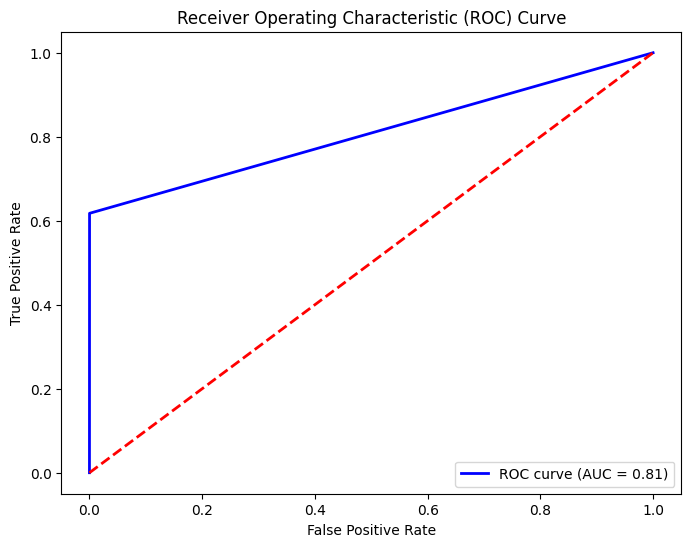

Confusion Matrix:
[[85294    13]
 [   52    84]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.62      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [41]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'SMOTE(train_data)')

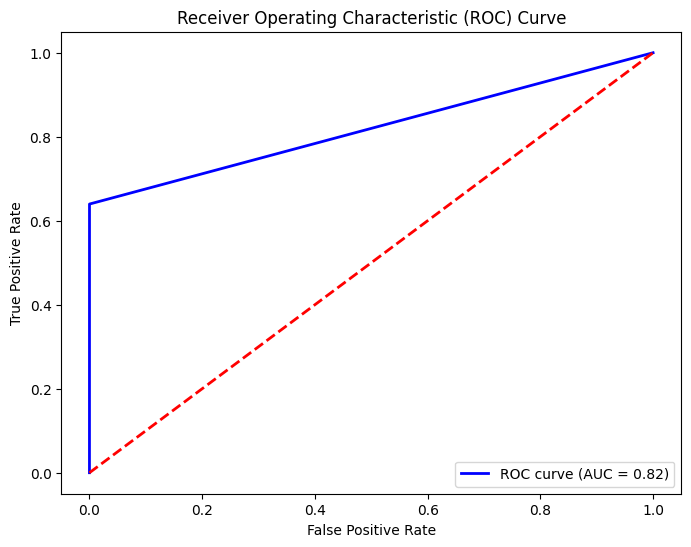

Confusion Matrix:
[[85301     6]
 [   49    87]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.64      0.76       136

    accuracy                           1.00     85443
   macro avg       0.97      0.82      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [42]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'SMOTE(train_data)')

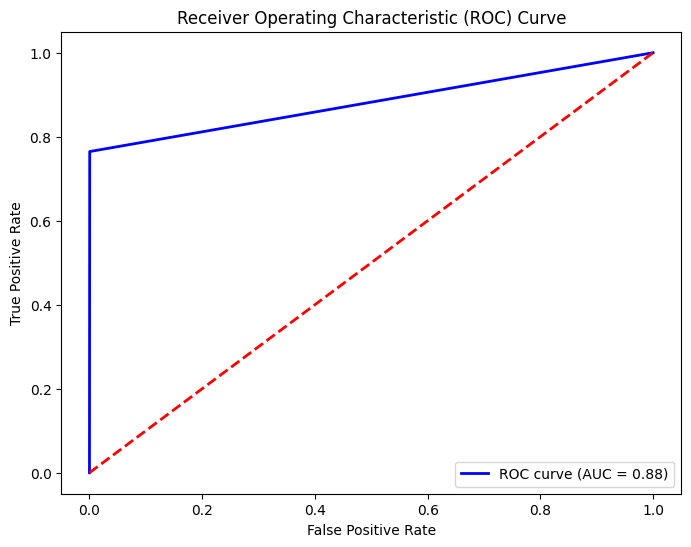

Confusion Matrix:
[[85268    39]
 [   32   104]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.76      0.75       136

    accuracy                           1.00     85443
   macro avg       0.86      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [43]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'SMOTE(train_data)')

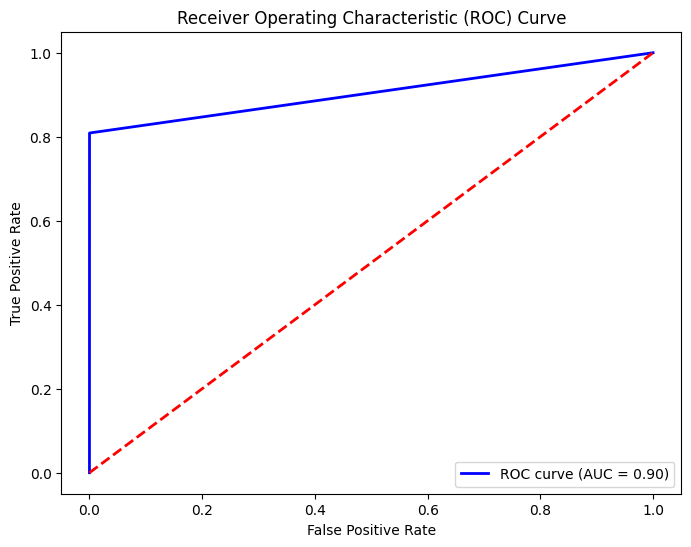

Confusion Matrix:
[[85298     9]
 [   26   110]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.81      0.86       136

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [44]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'SMOTE(train_data)')

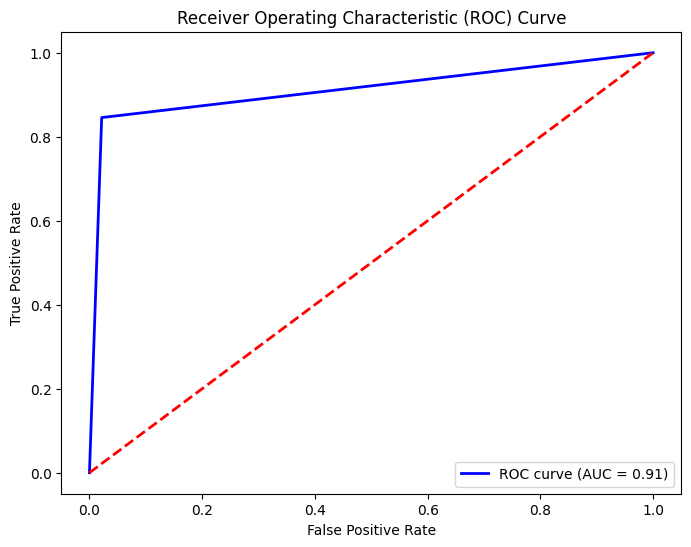

Confusion Matrix:
[[83456  1851]
 [   21   115]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [45]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, GaussianNB(), 'SMOTE(train_data)')

In [46]:
print(tabulate(results_df, headers='keys', tablefmt='pipe'))

|    | Balancing Technique   | Model Name               |   Accuracy |   Precision |   Recall |   AUC_ROCcurve |
|---:|:----------------------|:-------------------------|-----------:|------------:|---------:|---------------:|
|  0 | None                  | LogisticRegression()     |   0.999239 |   0.865979  | 0.617647 |       0.808747 |
|  1 | None                  | SVC()                    |   0.999356 |   0.935484  | 0.639706 |       0.819818 |
|  2 | None                  | DecisionTreeClassifier() |   0.999099 |   0.685535  | 0.801471 |       0.900442 |
|  3 | None                  | RandomForestClassifier() |   0.999614 |   0.947826  | 0.801471 |       0.9007   |
|  4 | None                  | GaussianNB()             |   0.978091 |   0.0584944 | 0.845588 |       0.911945 |
|  5 | SMOTE(train_data)     | LogisticRegression()     |   0.999239 |   0.865979  | 0.617647 |       0.808747 |
|  6 | SMOTE(train_data)     | SVC()                    |   0.999356 |   0.935484  | 0.639706 | 

## Experiment no 3:Resampling by SMOTE(Whole_data).

In [47]:
del(fraud_train)
# Split dataset into train and test
fraud_whole=apply_smote(fraud, 'Class')



In [48]:
fraud_whole.to_csv('fraud_balanced_smote_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file


In [49]:
value_counts = fraud_whole['Class'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 284315
Category value 1: Number of occurrences: 284315


In [50]:
fraud_whole=dealing_with_duplicates(fraud_whole)


X = fraud_whole.drop('Class', axis=1)
y = fraud_whole['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


Number of duplicate rows in your data set: 16595
All the duplicate rows have been deleted from data set


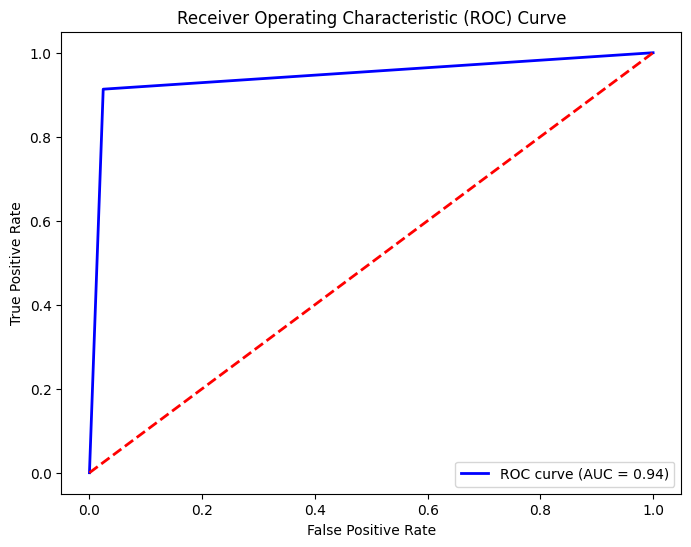

Confusion Matrix:
[[80603  2016]
 [ 7204 75788]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     82619
           1       0.97      0.91      0.94     82992

    accuracy                           0.94    165611
   macro avg       0.95      0.94      0.94    165611
weighted avg       0.95      0.94      0.94    165611



In [51]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'SMOTE(whole_data)')

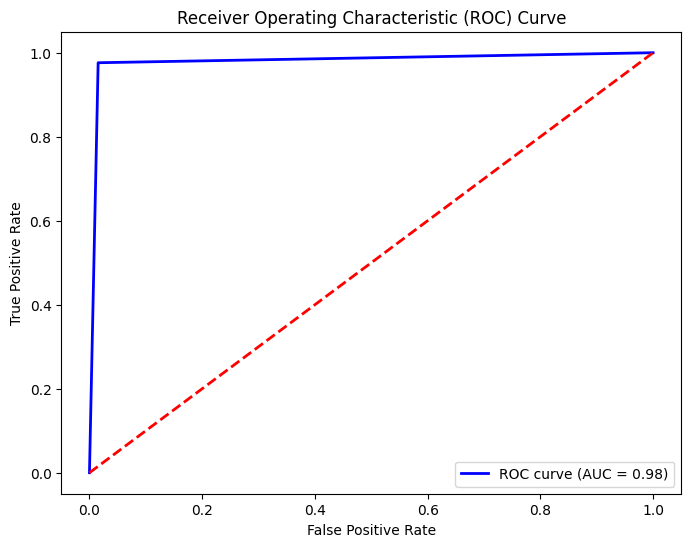

Confusion Matrix:
[[81346  1273]
 [ 1979 81013]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     82619
           1       0.98      0.98      0.98     82992

    accuracy                           0.98    165611
   macro avg       0.98      0.98      0.98    165611
weighted avg       0.98      0.98      0.98    165611



In [52]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'SMOTE(whole_data)')

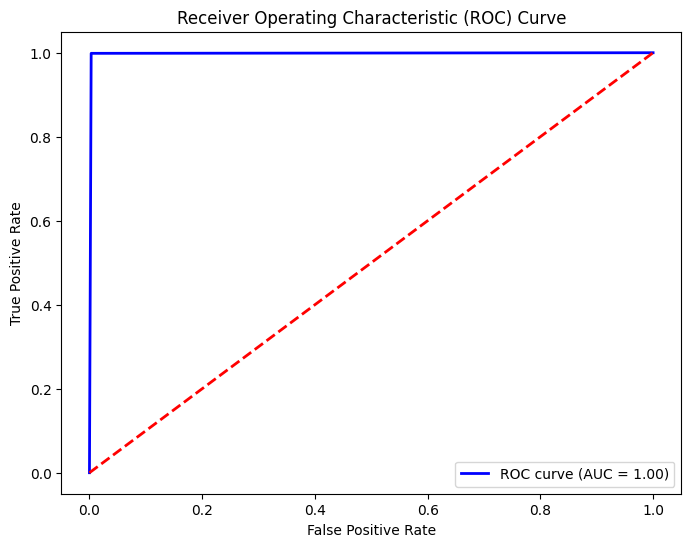

Confusion Matrix:
[[82369   250]
 [  121 82871]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82619
           1       1.00      1.00      1.00     82992

    accuracy                           1.00    165611
   macro avg       1.00      1.00      1.00    165611
weighted avg       1.00      1.00      1.00    165611



In [53]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'SMOTE(whole_data)')

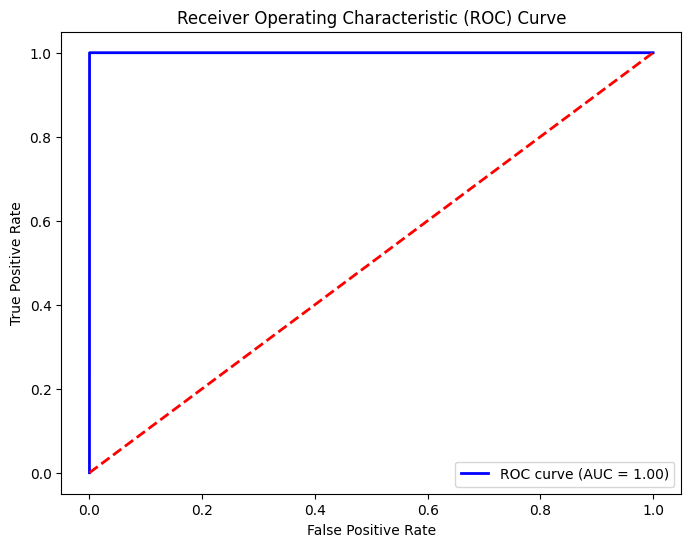

Confusion Matrix:
[[82607    12]
 [    0 82992]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82619
           1       1.00      1.00      1.00     82992

    accuracy                           1.00    165611
   macro avg       1.00      1.00      1.00    165611
weighted avg       1.00      1.00      1.00    165611



In [54]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'SMOTE(whole_data)')

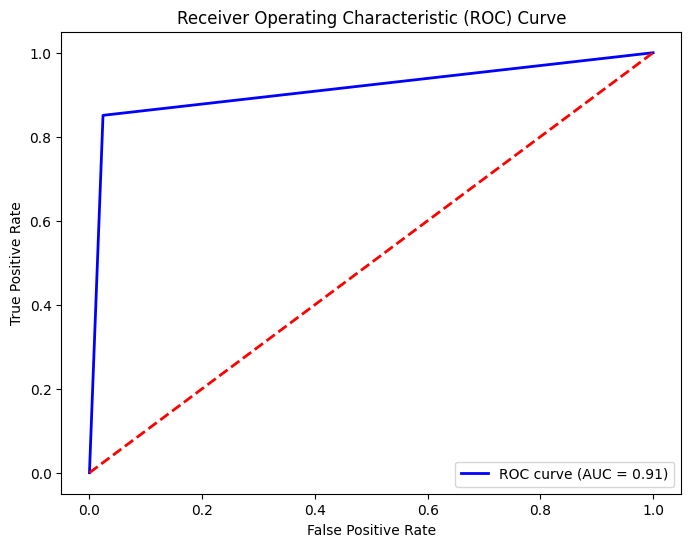

Confusion Matrix:
[[80633  1986]
 [12372 70620]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     82619
           1       0.97      0.85      0.91     82992

    accuracy                           0.91    165611
   macro avg       0.92      0.91      0.91    165611
weighted avg       0.92      0.91      0.91    165611



In [55]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, GaussianNB(), 'SMOTE(whole_data)')

In [56]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+---------------------+--------------------------+--------------------+---------------------+--------------------+--------------------+
|    | Balancing Technique |        Model Name        |      Accuracy      |      Precision      |       Recall       |    AUC_ROCcurve    |
+----+---------------------+--------------------------+--------------------+---------------------+--------------------+--------------------+
| 0  |        None         |   LogisticRegression()   | 0.9992392589211521 |  0.865979381443299  | 0.6176470588235294 | 0.8087473340233441 |
| 1  |        None         |          SVC()           | 0.9993562960102056 | 0.9354838709677419  | 0.6397058823529411 | 0.8198177740741226 |
| 2  |        None         | DecisionTreeClassifier() | 0.9990988144142879 | 0.6855345911949685  | 0.8014705882352942 | 0.9004422349314138 |
| 3  |        None         | RandomForestClassifier() | 0.9996137776061234 | 0.9478260869565217  | 0.8014705882352942 | 0.9007001270152991 |
| 4  |       

## Experiment no 4:Resampling by Adasyn(train_data)

In [57]:
# Split dataset into train and test
X = fraud.drop('Class', axis=1)
y = fraud['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

fraud_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)


fraud_train=apply_adasyn(fraud_train, 'Class')
fraud_train.to_csv('fraud_adasyn_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file


In [58]:
value_counts = fraud_train['Class'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 1: Number of occurrences: 199036
Category value 0: Number of occurrences: 199008


In [59]:
fraud_train=dealing_with_duplicates(fraud_train)
X = fraud_train.drop('Class', axis=1)
y = fraud_train['Class']

Number of duplicate rows in your data set: 5834
All the duplicate rows have been deleted from data set


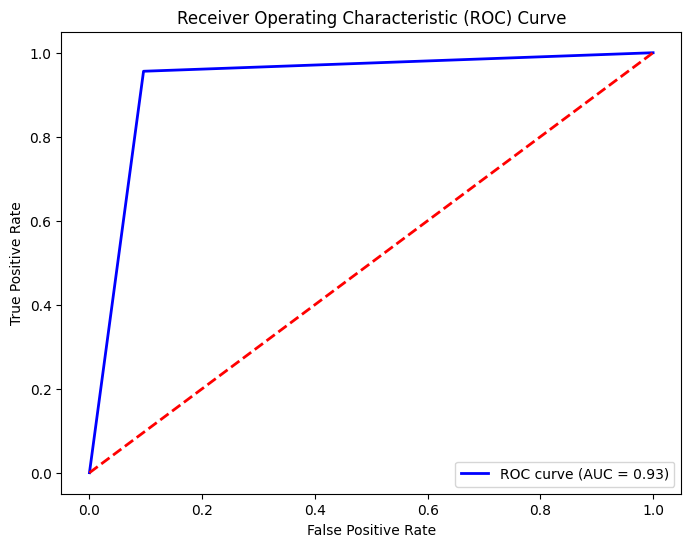

Confusion Matrix:
[[77121  8186]
 [    6   130]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.02      0.96      0.03       136

    accuracy                           0.90     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.90      0.95     85443



In [60]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, LogisticRegression(), 'ADASYN(train_data)')

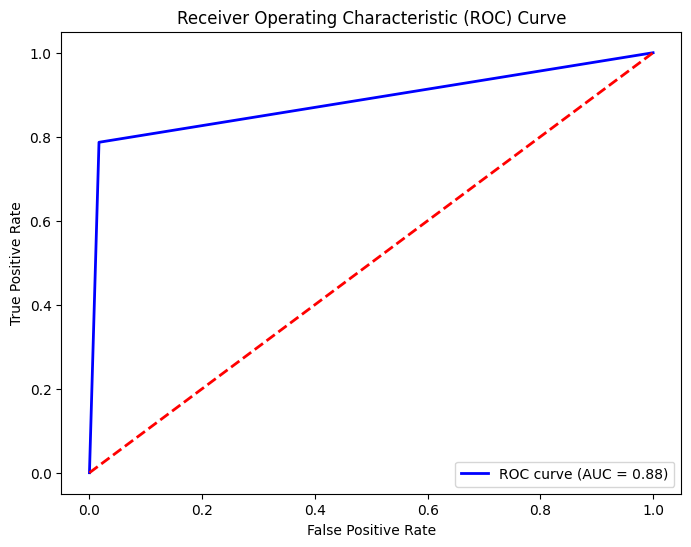

Confusion Matrix:
[[83864  1443]
 [   29   107]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.07      0.79      0.13       136

    accuracy                           0.98     85443
   macro avg       0.53      0.88      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [61]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, SVC(), 'ADASYN(train_data)')

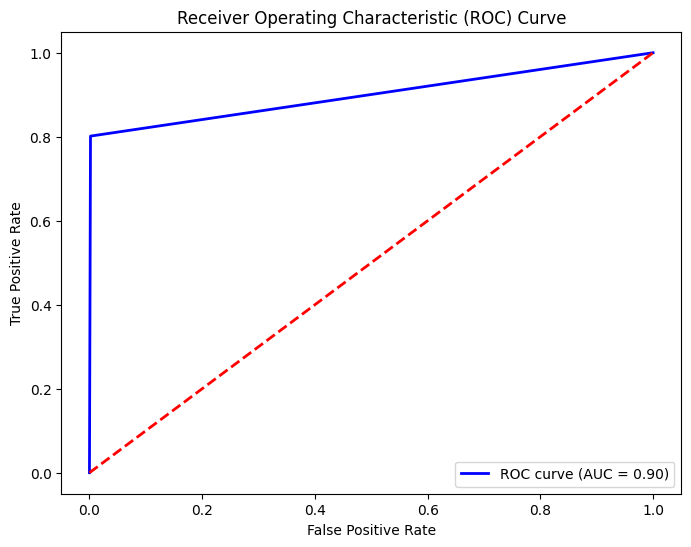

Confusion Matrix:
[[85149   158]
 [   27   109]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.41      0.80      0.54       136

    accuracy                           1.00     85443
   macro avg       0.70      0.90      0.77     85443
weighted avg       1.00      1.00      1.00     85443



In [62]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, DecisionTreeClassifier(), 'ADASYN(train_data)')

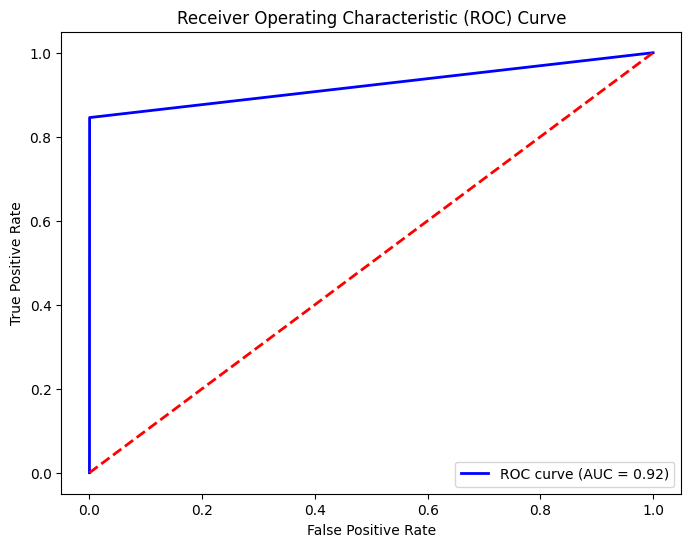

Confusion Matrix:
[[85286    21]
 [   21   115]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.85      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [63]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, RandomForestClassifier(), 'ADASYN(train_data)')

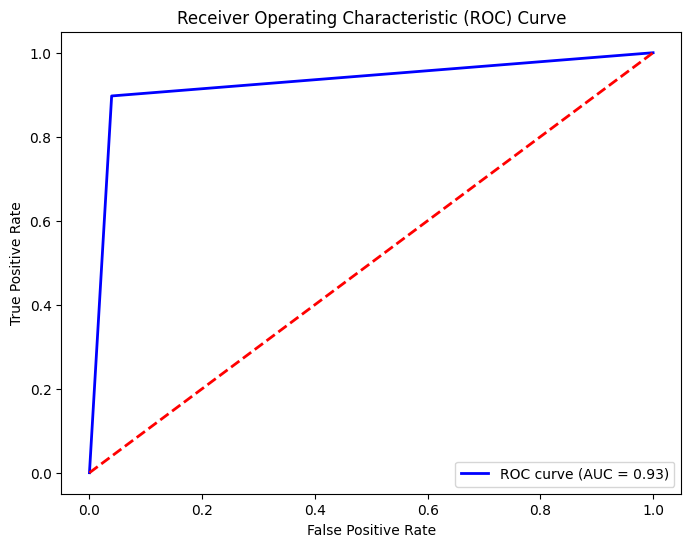

Confusion Matrix:
[[81948  3359]
 [   14   122]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.90      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [64]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, GaussianNB(), 'ADASYN(train_data)')

In [65]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+---------------------+--------------------------+--------------------+----------------------+--------------------+--------------------+
|    | Balancing Technique |        Model Name        |      Accuracy      |      Precision       |       Recall       |    AUC_ROCcurve    |
+----+---------------------+--------------------------+--------------------+----------------------+--------------------+--------------------+
| 0  |        None         |   LogisticRegression()   | 0.9992392589211521 |  0.865979381443299   | 0.6176470588235294 | 0.8087473340233441 |
| 1  |        None         |          SVC()           | 0.9993562960102056 |  0.9354838709677419  | 0.6397058823529411 | 0.8198177740741226 |
| 2  |        None         | DecisionTreeClassifier() | 0.9990988144142879 |  0.6855345911949685  | 0.8014705882352942 | 0.9004422349314138 |
| 3  |        None         | RandomForestClassifier() | 0.9996137776061234 |  0.9478260869565217  | 0.8014705882352942 | 0.9007001270152991 |
| 4  |

## Experiment no 6:Resampling by Under Sampling(train_data):

In [66]:
# Split dataset into train and test
X = fraud.drop('Class', axis=1)
y = fraud['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


X_train,y_train=apply_undersampling(X_train,y_train)
fraud_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
fraud_train.to_csv('fraud_undersample_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file


In [67]:
value_counts = fraud_train['Class'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 356
Category value 1: Number of occurrences: 356


In [68]:
churn_train=dealing_with_duplicates(fraud_train)
X = fraud_train.drop('Class', axis=1)
y = fraud_train['Class']

Number of duplicate rows in your data set: 9
All the duplicate rows have been deleted from data set


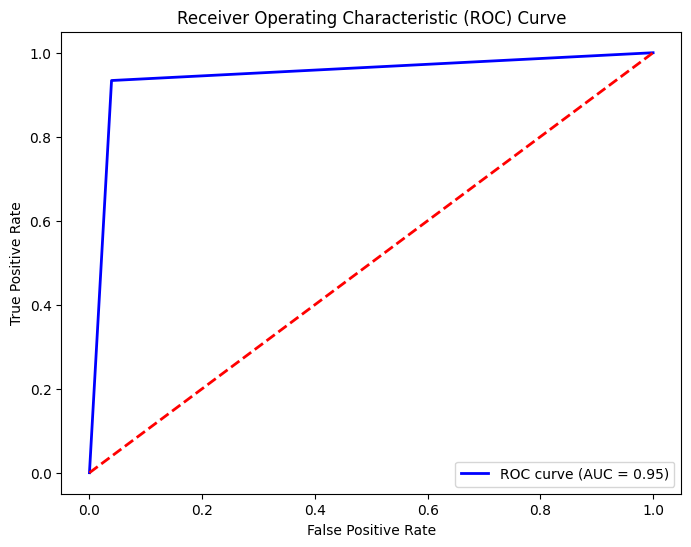

Confusion Matrix:
[[81965  3342]
 [    9   127]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [69]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, LogisticRegression(), 'UnderSampling(train_data)')

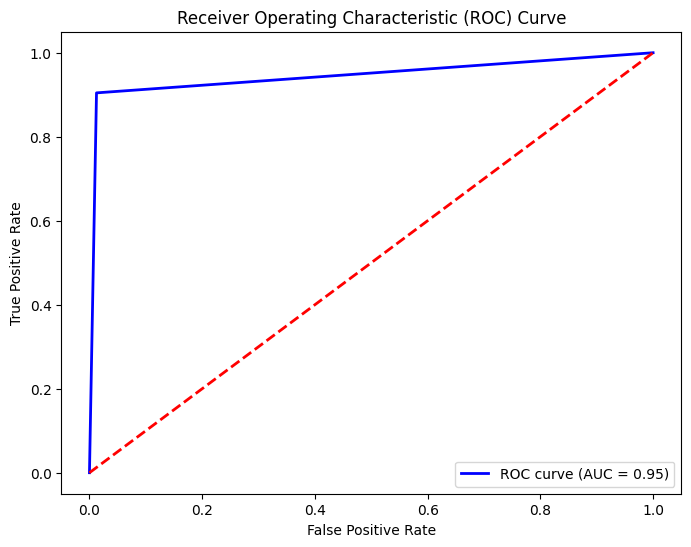

Confusion Matrix:
[[84241  1066]
 [   13   123]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.10      0.90      0.19       136

    accuracy                           0.99     85443
   macro avg       0.55      0.95      0.59     85443
weighted avg       1.00      0.99      0.99     85443



In [70]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, SVC(), 'UnderSampling(train_data)')

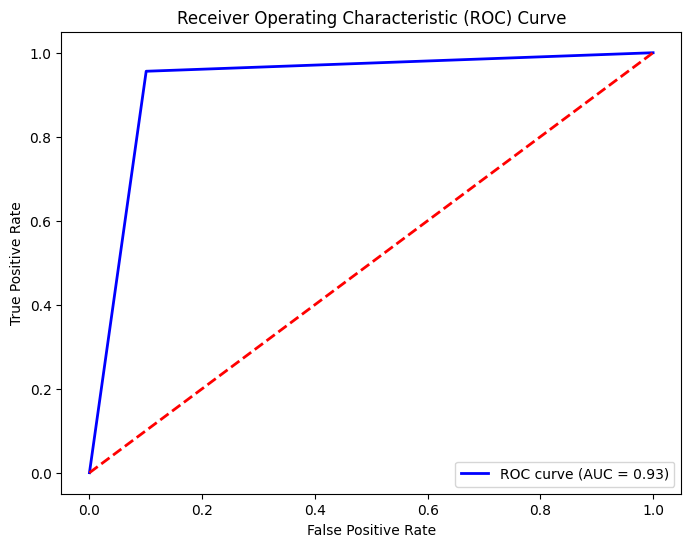

Confusion Matrix:
[[76722  8585]
 [    6   130]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.01      0.96      0.03       136

    accuracy                           0.90     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.90      0.95     85443



In [71]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, DecisionTreeClassifier(), 'UnderSampling(train_data)')

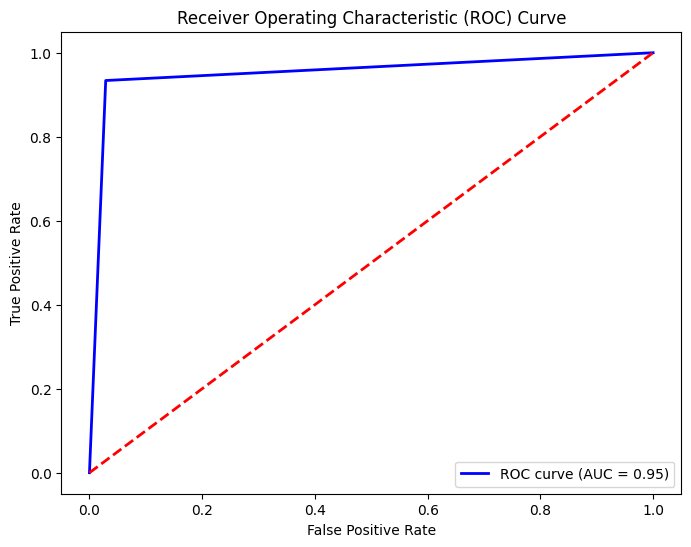

Confusion Matrix:
[[82848  2459]
 [    9   127]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [72]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, RandomForestClassifier(), 'UnderSampling(train_data)')

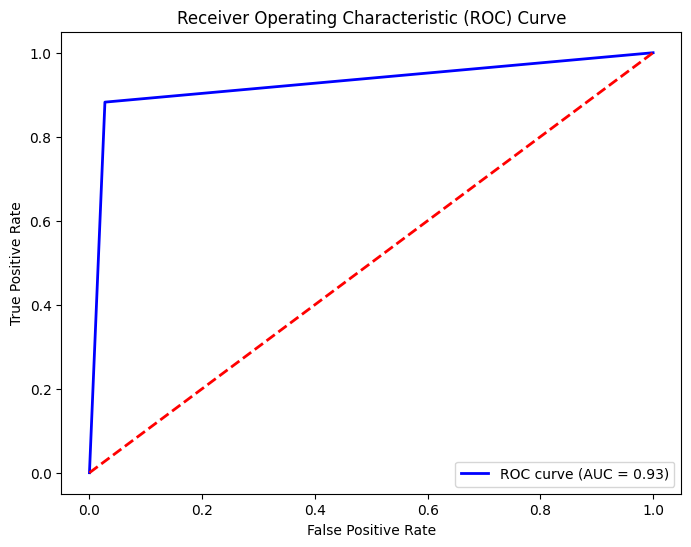

Confusion Matrix:
[[82967  2340]
 [   16   120]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.88      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [73]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, GaussianNB(), 'UnderSampling(train_data)')

In [74]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------+--------------------------+--------------------+----------------------+--------------------+--------------------+
|    |    Balancing Technique    |        Model Name        |      Accuracy      |      Precision       |       Recall       |    AUC_ROCcurve    |
+----+---------------------------+--------------------------+--------------------+----------------------+--------------------+--------------------+
| 0  |           None            |   LogisticRegression()   | 0.9992392589211521 |  0.865979381443299   | 0.6176470588235294 | 0.8087473340233441 |
| 1  |           None            |          SVC()           | 0.9993562960102056 |  0.9354838709677419  | 0.6397058823529411 | 0.8198177740741226 |
| 2  |           None            | DecisionTreeClassifier() | 0.9990988144142879 |  0.6855345911949685  | 0.8014705882352942 | 0.9004422349314138 |
| 3  |           None            | RandomForestClassifier() | 0.9996137776061234 |  0.9478260869565217  | 0.8014

## Experiment no 7:Resampling by Under Sampling(whole_data):

In [75]:
# Split dataset into train and test
X = fraud.drop('Class', axis=1)
y = fraud['Class']
X,y=apply_undersampling(X, y)


fraud_train = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
fraud_train.to_csv('fraud_undersample_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file

In [76]:
value_counts = fraud_train['Class'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 492
Category value 1: Number of occurrences: 492


In [77]:
fraud_train=dealing_with_duplicates(fraud_train)
X = fraud_train.drop('Class', axis=1)
y = fraud_train['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

Number of duplicate rows in your data set: 19
All the duplicate rows have been deleted from data set


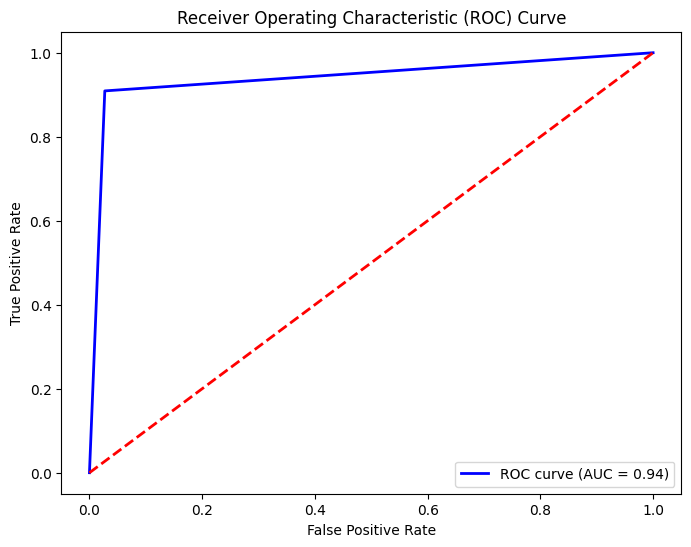

Confusion Matrix:
[[143   4]
 [ 13 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       147
           1       0.97      0.91      0.94       143

    accuracy                           0.94       290
   macro avg       0.94      0.94      0.94       290
weighted avg       0.94      0.94      0.94       290



In [78]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'UnderSampling(whole_data)')

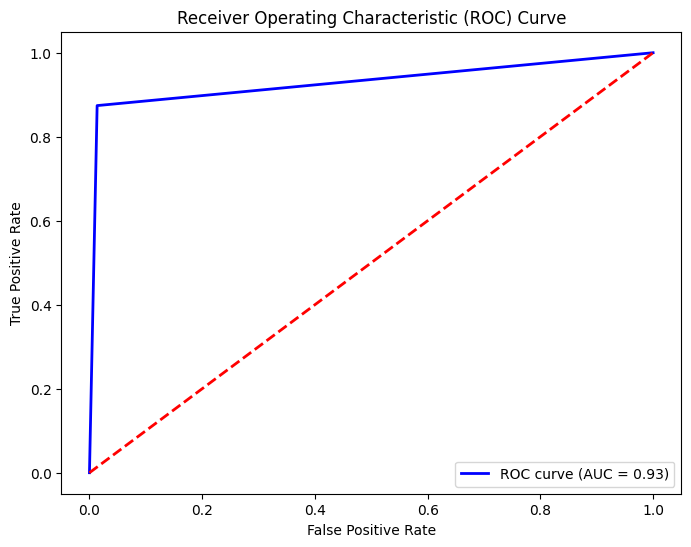

Confusion Matrix:
[[145   2]
 [ 18 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       147
           1       0.98      0.87      0.93       143

    accuracy                           0.93       290
   macro avg       0.94      0.93      0.93       290
weighted avg       0.94      0.93      0.93       290



In [79]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'UnderSampling(whole_data)')

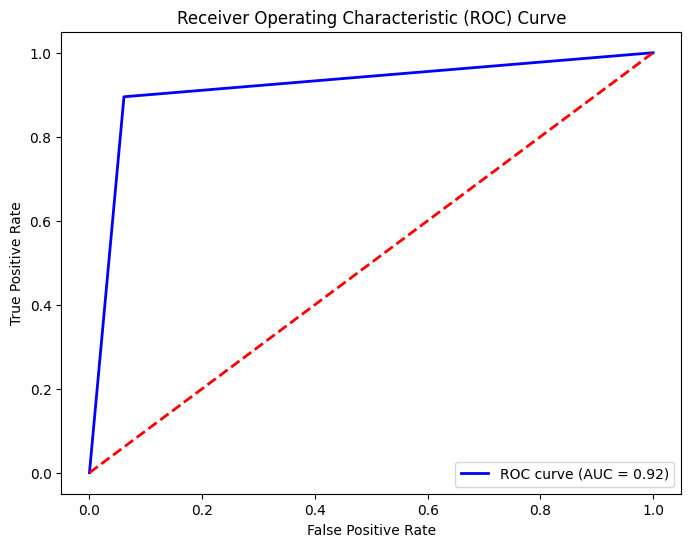

Confusion Matrix:
[[138   9]
 [ 15 128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       147
           1       0.93      0.90      0.91       143

    accuracy                           0.92       290
   macro avg       0.92      0.92      0.92       290
weighted avg       0.92      0.92      0.92       290



In [80]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'UnderSampling(whole_data)')

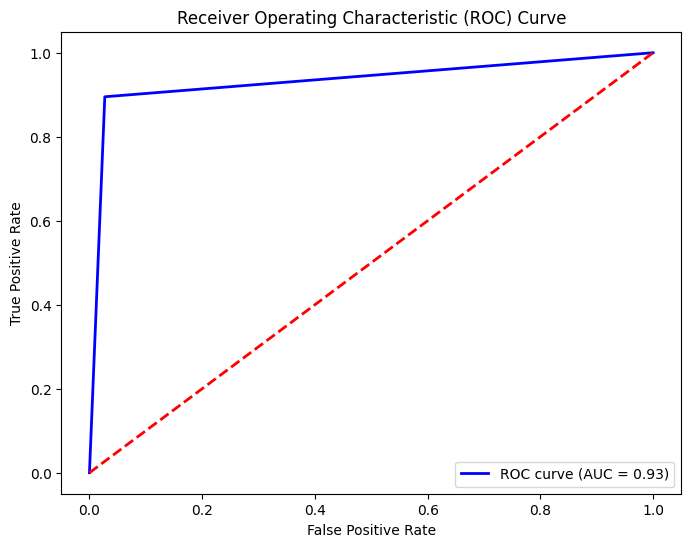

Confusion Matrix:
[[143   4]
 [ 15 128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       147
           1       0.97      0.90      0.93       143

    accuracy                           0.93       290
   macro avg       0.94      0.93      0.93       290
weighted avg       0.94      0.93      0.93       290



In [81]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'UnderSampling(whole_data)')

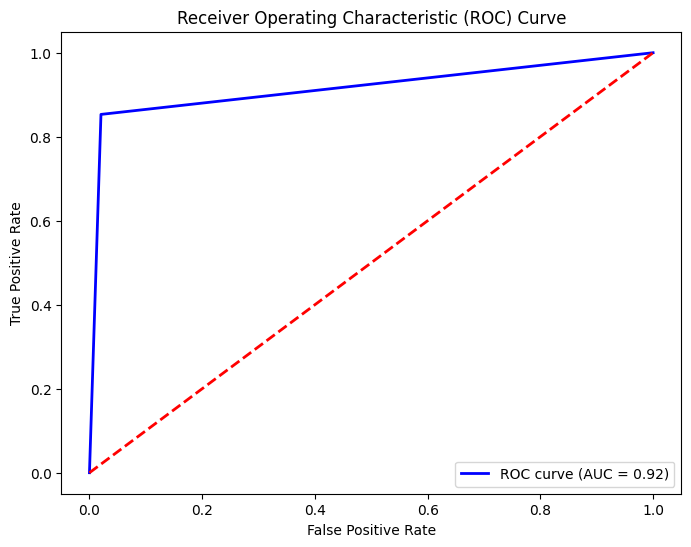

Confusion Matrix:
[[144   3]
 [ 21 122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       147
           1       0.98      0.85      0.91       143

    accuracy                           0.92       290
   macro avg       0.92      0.92      0.92       290
weighted avg       0.92      0.92      0.92       290



In [82]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, GaussianNB(), 'UnderSampling(whole_data)')

In [83]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------+--------------------------+--------------------+----------------------+--------------------+--------------------+
|    |    Balancing Technique    |        Model Name        |      Accuracy      |      Precision       |       Recall       |    AUC_ROCcurve    |
+----+---------------------------+--------------------------+--------------------+----------------------+--------------------+--------------------+
| 0  |           None            |   LogisticRegression()   | 0.9992392589211521 |  0.865979381443299   | 0.6176470588235294 | 0.8087473340233441 |
| 1  |           None            |          SVC()           | 0.9993562960102056 |  0.9354838709677419  | 0.6397058823529411 | 0.8198177740741226 |
| 2  |           None            | DecisionTreeClassifier() | 0.9990988144142879 |  0.6855345911949685  | 0.8014705882352942 | 0.9004422349314138 |
| 3  |           None            | RandomForestClassifier() | 0.9996137776061234 |  0.9478260869565217  | 0.8014

## Experiment 8: Algorithmic Method (Class weighting):

In [84]:
X = fraud.drop('Class', axis=1)
y = fraud['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


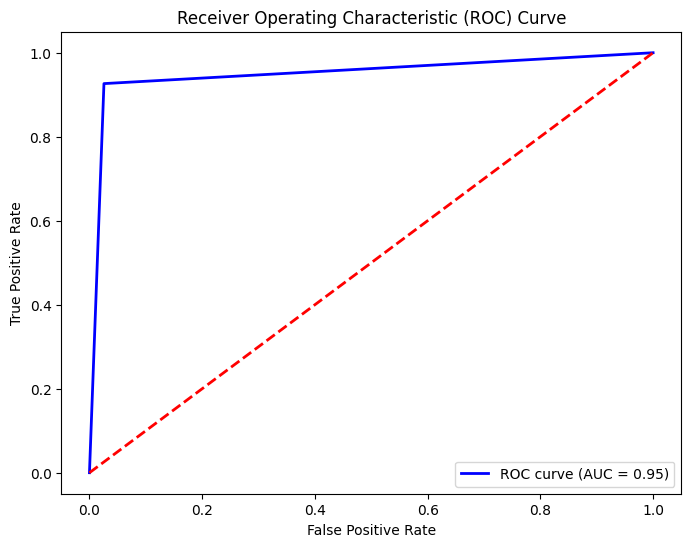

Confusion Matrix:
[[83114  2193]
 [   10   126]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443



In [85]:
apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

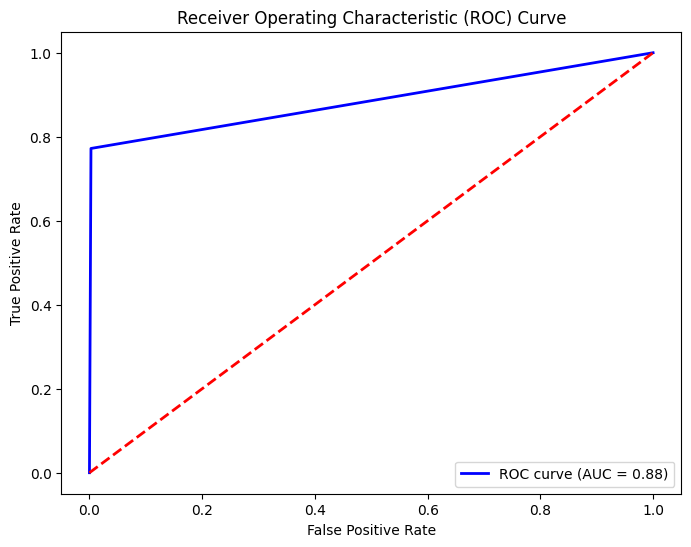

Confusion Matrix:
[[85079   228]
 [   31   105]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.32      0.77      0.45       136

    accuracy                           1.00     85443
   macro avg       0.66      0.88      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [86]:
apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

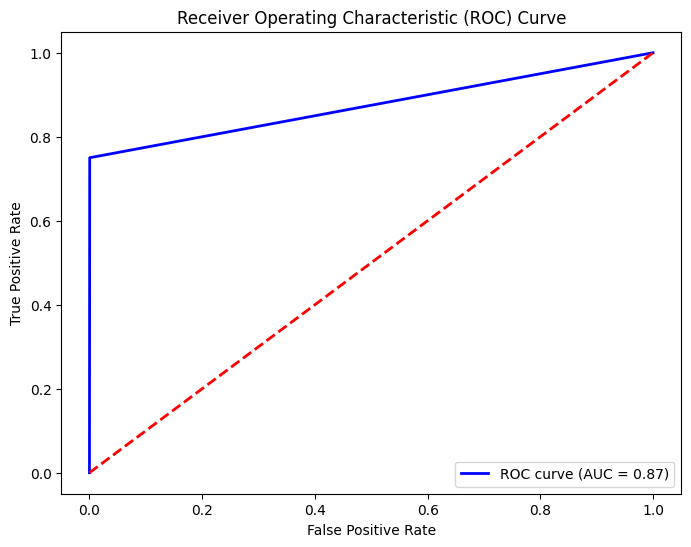

Confusion Matrix:
[[85269    38]
 [   34   102]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.75      0.74       136

    accuracy                           1.00     85443
   macro avg       0.86      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [87]:
apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

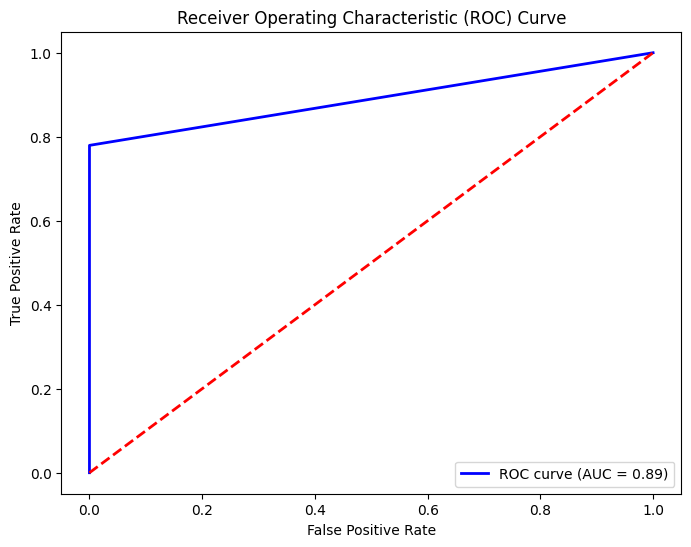

Confusion Matrix:
[[85304     3]
 [   30   106]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.97      0.78      0.87       136

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [88]:
apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

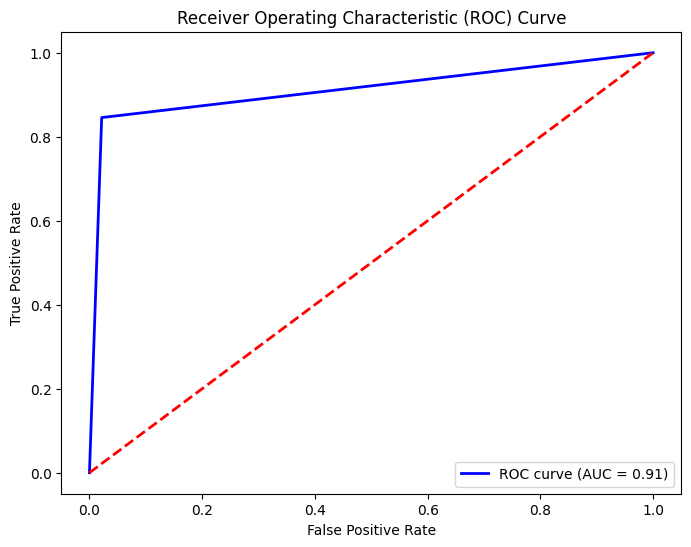

Confusion Matrix:
[[83456  1851]
 [   21   115]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [89]:
apply_ML_algov3(X_train, y_train, X_test, y_test, GaussianNB(), 'Class weightining(Algorithmic Method)')


## Experiment no 10: GAN(whole_data)

In [90]:

balanced_df=import_dataset(r'G:\USB data\IBA\IBA PhD\Course Work\Machine Learnin1\Project\Creditfraud\balanced_df_GAN.csv')
balanced_df=dealing_with_duplicates(balanced_df)
# Split dataset into train and test
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


value_counts = balanced_df['Class'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Number of duplicate rows in your data set: 0
All the duplicate rows have been deleted from data set
Category value 1.0: Number of occurrences: 283823
Category value 0.0: Number of occurrences: 275190


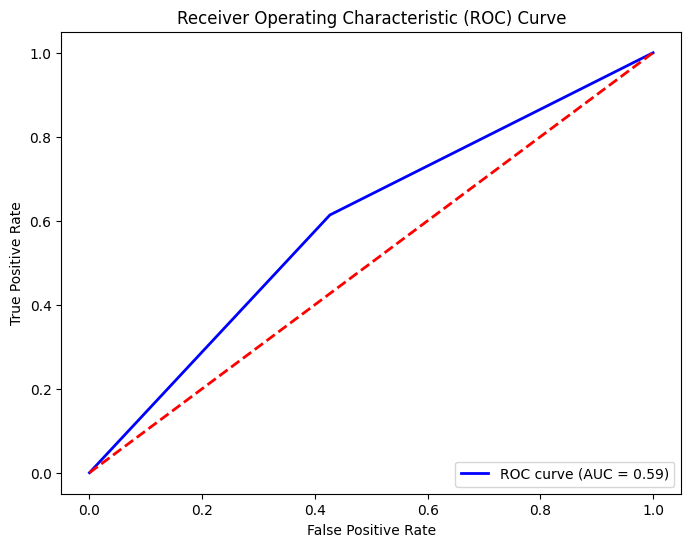

Confusion Matrix:
[[47253 35147]
 [32958 52346]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58     82400
         1.0       0.60      0.61      0.61     85304

    accuracy                           0.59    167704
   macro avg       0.59      0.59      0.59    167704
weighted avg       0.59      0.59      0.59    167704



In [91]:
apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'GAN(whole_data)')



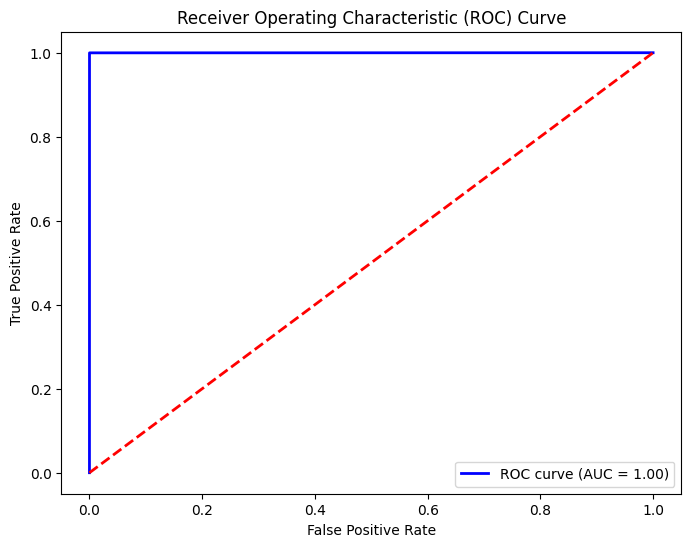

Confusion Matrix:
[[82394     6]
 [   26 85278]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82400
         1.0       1.00      1.00      1.00     85304

    accuracy                           1.00    167704
   macro avg       1.00      1.00      1.00    167704
weighted avg       1.00      1.00      1.00    167704



In [92]:
apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'GAN(whole_data)')


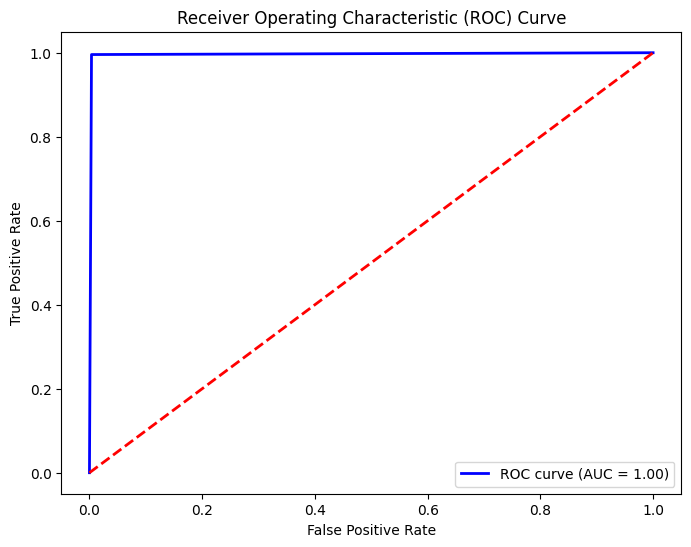

Confusion Matrix:
[[82101   299]
 [  371 84933]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82400
         1.0       1.00      1.00      1.00     85304

    accuracy                           1.00    167704
   macro avg       1.00      1.00      1.00    167704
weighted avg       1.00      1.00      1.00    167704



In [93]:
apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'GAN(whole_data)')


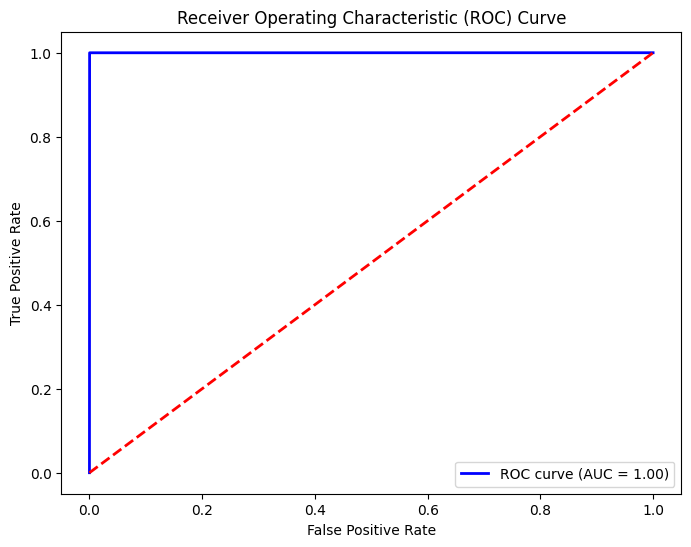

Confusion Matrix:
[[82380    20]
 [   12 85292]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82400
         1.0       1.00      1.00      1.00     85304

    accuracy                           1.00    167704
   macro avg       1.00      1.00      1.00    167704
weighted avg       1.00      1.00      1.00    167704



In [94]:
apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'GAN(whole_data)')


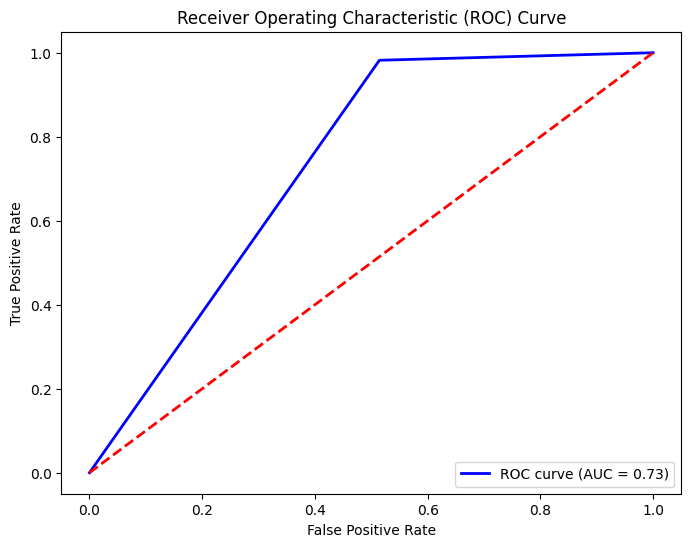

Confusion Matrix:
[[40010 42390]
 [ 1531 83773]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.49      0.65     82400
         1.0       0.66      0.98      0.79     85304

    accuracy                           0.74    167704
   macro avg       0.81      0.73      0.72    167704
weighted avg       0.81      0.74      0.72    167704



In [95]:
apply_ML_algov2(X_train, y_train, X_test, y_test, GaussianNB(), 'GAN(whole_data)')


In [96]:
from tabulate import tabulate
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------------------+------------------------------------------------------------------+--------------------+----------------------+--------------------+--------------------+
|    |          Balancing Technique          |                            Model Name                            |      Accuracy      |      Precision       |       Recall       |    AUC_ROCcurve    |
+----+---------------------------------------+------------------------------------------------------------------+--------------------+----------------------+--------------------+--------------------+
| 0  |                 None                  |                       LogisticRegression()                       | 0.9992392589211521 |  0.865979381443299   | 0.6176470588235294 | 0.8087473340233441 |
| 1  |                 None                  |                              SVC()                               | 0.9993562960102056 |  0.9354838709677419  | 0.6397058823529411 | 0.8198177740741226 |


## Experiment no 11:GAN(train_data)

In [97]:

# Split the dataset into features (X) and labels (y)
X1 = fraud.drop(columns=['Class'])
y1 = fraud['Class']

X_train, X1_test, y_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=42)


balanced_df_train=import_dataset(r'G:\USB data\IBA\IBA PhD\Course Work\Machine Learnin1\Project\Creditfraud\balanced_df_GAN_train.csv')


balanced_df_train=dealing_with_duplicates(balanced_df_train)
# Split dataset into train and test
X = balanced_df_train.drop('Class', axis=1)
y = balanced_df_train['Class']


value_counts = balanced_df_train['Class'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Number of duplicate rows in your data set: 5165
All the duplicate rows have been deleted from data set
Category value 1.0: Number of occurrences: 198652
Category value 0.0: Number of occurrences: 193843


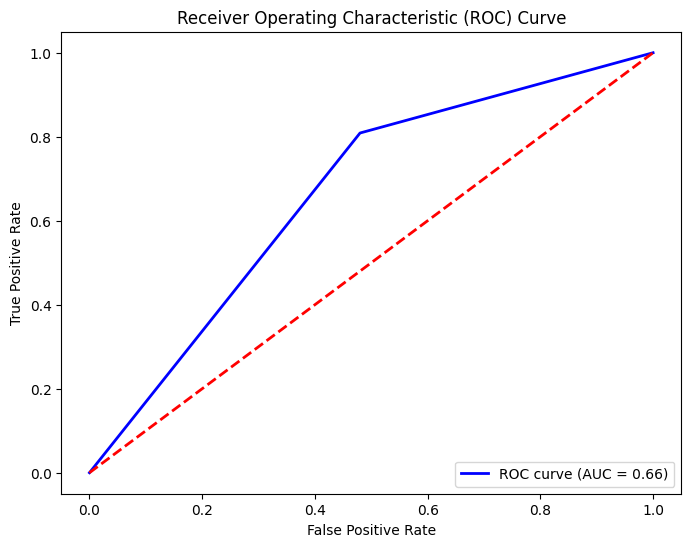

Confusion Matrix:
[[44356 40951]
 [   26   110]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.52      0.68     85307
           1       0.00      0.81      0.01       136

    accuracy                           0.52     85443
   macro avg       0.50      0.66      0.34     85443
weighted avg       1.00      0.52      0.68     85443



In [98]:
apply_ML_algov2(X, y, X1_test, y1_test, LogisticRegression(), 'GAN(train_data)')

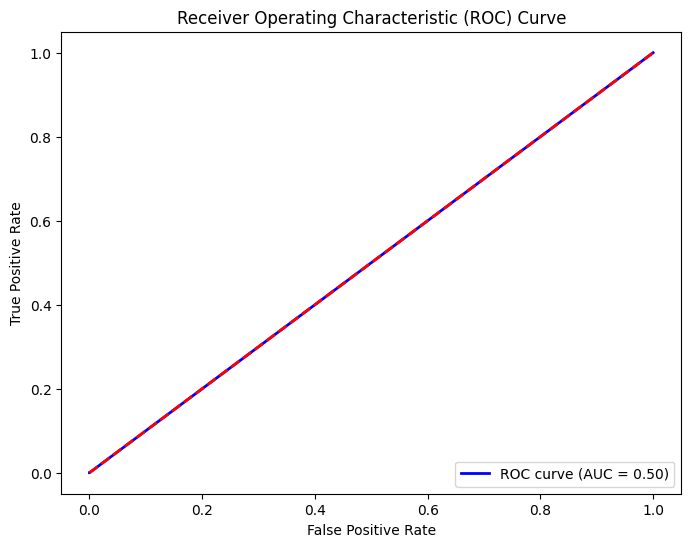

Confusion Matrix:
[[85301     6]
 [  136     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [99]:
apply_ML_algov2(X, y, X1_test, y1_test, SVC(), 'GAN(train_data)')


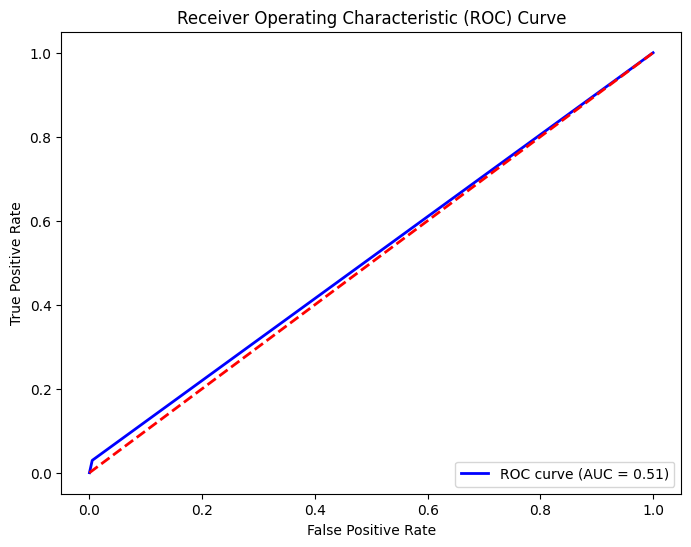

Confusion Matrix:
[[84887   420]
 [  132     4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.01      0.03      0.01       136

    accuracy                           0.99     85443
   macro avg       0.50      0.51      0.51     85443
weighted avg       1.00      0.99      1.00     85443



In [100]:
apply_ML_algov2(X, y, X1_test, y1_test, DecisionTreeClassifier(), 'GAN(train_data)')


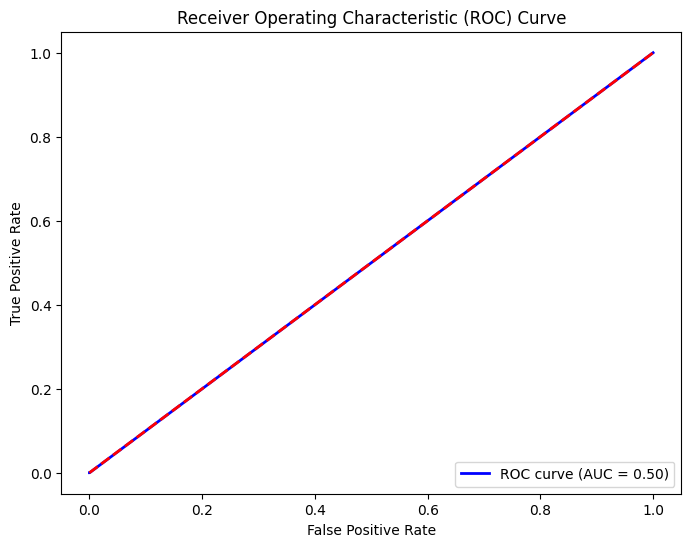

Confusion Matrix:
[[85289    18]
 [  136     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [101]:
apply_ML_algov2(X, y, X1_test, y1_test, RandomForestClassifier(), 'GAN(train_data)')


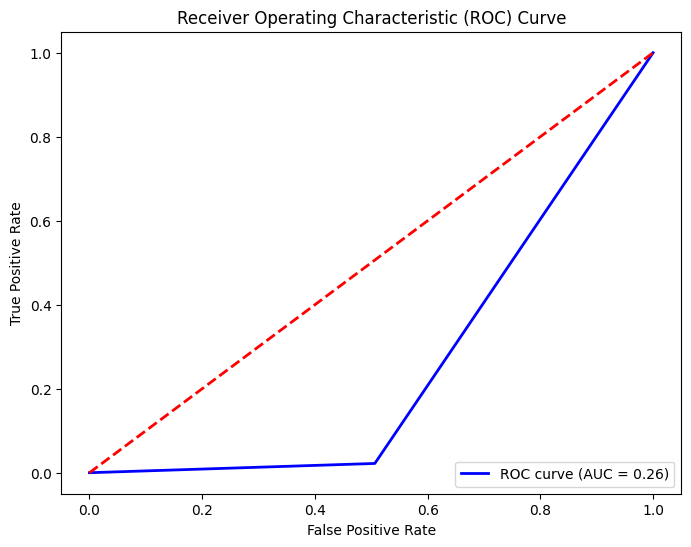

Confusion Matrix:
[[42117 43190]
 [  133     3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66     85307
           1       0.00      0.02      0.00       136

    accuracy                           0.49     85443
   macro avg       0.50      0.26      0.33     85443
weighted avg       1.00      0.49      0.66     85443



In [102]:
apply_ML_algov2(X, y, X1_test, y1_test, GaussianNB(), 'GAN(train_data)')


In [103]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))


+----+---------------------------------------+------------------------------------------------------------------+--------------------+-----------------------+----------------------+---------------------+
|    |          Balancing Technique          |                            Model Name                            |      Accuracy      |       Precision       |        Recall        |    AUC_ROCcurve     |
+----+---------------------------------------+------------------------------------------------------------------+--------------------+-----------------------+----------------------+---------------------+
| 0  |                 None                  |                       LogisticRegression()                       | 0.9992392589211521 |   0.865979381443299   |  0.6176470588235294  | 0.8087473340233441  |
| 1  |                 None                  |                              SVC()                               | 0.9993562960102056 |  0.9354838709677419   |  0.6397058823529411  | 0.

In [104]:
results_df.to_csv('results__creditcard_df.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file
